In [1]:
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize

from itertools import cycle

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
from sklearn.model_selection import train_test_split
from dt import DecisionTreeClassifier
from kmeans import KMeansClusterClassifier
from statistics import mode

#### Read Dataset

In [2]:
iris = pd.read_csv("Iris.csv");

Improve dataset: Remove id column, Change Class labels that are given in the last column to integer values(0, 1, 2)

In [3]:
iris = iris.drop(columns="Id");
spc = {'Iris-setosa':0, 'Iris-versicolor':1, 'Iris-virginica':2}
iris["Species"] = [spc[item] for item in iris["Species"]];

# Train the classifier

Split dataset to train and test

In [4]:
X_train, X_test, y_train, y_test = train_test_split(iris.drop(columns="Species"), iris["Species"], test_size=0.2, shuffle=True);

X_train_list=X_train.values.tolist();
y_train_list=y_train.values.tolist();
X_test_list=X_test.values.tolist();
y_test_list=y_test.values.tolist();

#### Find K Value Using Elbow Method

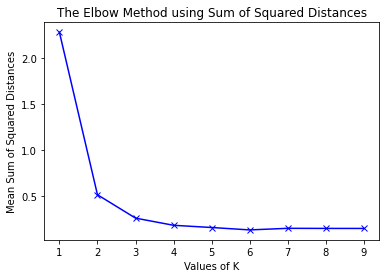

In [5]:
mean_sum_of_distances = []
K = range(1,10)
for k in K:
    kmeans = KMeansClusterClassifier(k)
    kmeans.fit(X_train_list)
    sum_of_distance = kmeans.get_sum_of_distances_from_their_closest_centroids(X_train_list)
    mean_sum_of_distances.append(sum_of_distance/(2*len(X_train_list)))

plt.plot(K, mean_sum_of_distances, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Mean Sum of Squared Distances')
plt.title('The Elbow Method using Sum of Squared Distances')
plt.show()

According to the graph we created using the Elbow method, the most optimal n_cluster value seems to be 3

### Train The Classifier

In [6]:
# Train KMeans Cluster Classifier
n_cluster = 3
kmeans = KMeansClusterClassifier(n_cluster)
kmeans.fit(X_train_list)

# Train Decision Tree Classifier
X_train_list_copy=X_train.values.tolist();
dtClassifier = DecisionTreeClassifier(max_depth=5)
dtClassifier.fit(X_train_list_copy,y_train_list);

Update Labels According to Original

In [7]:
classes = [[] for _ in range(n_cluster)]
for i in range(n_cluster):
    for j in kmeans.clusters[i]:
        classes[i].append(y_train_list[j])

new_clusters = [[] for _ in range(n_cluster)]
new_centroids = [[] for _ in range(n_cluster)]
for i in range(n_cluster):
    new_clusters[mode(classes[i])] = kmeans.clusters[i]
    new_centroids[mode(classes[i])] = kmeans.centroids[i]

kmeans.clusters = new_clusters
kmeans.centroids = new_centroids

### Predict Class of Test values

In [8]:
kmeans_test_predictions = kmeans.predict(X_test_list)
print("Test Features Expected Classification")
print(y_test_list)
print("Prediction")
print(kmeans_test_predictions);
kmeans_train_predictions = kmeans.predict(X_train_list)
print("Train Features Expected Classification")
print(y_train_list)
print("Prediction")
print(kmeans_train_predictions);

Test Features Expected Classification
[1, 0, 2, 0, 1, 0, 2, 1, 2, 1, 2, 1, 1, 1, 2, 0, 2, 2, 0, 0, 0, 1, 2, 1, 2, 1, 1, 1, 0, 1]
Prediction
[1, 0, 2, 0, 1, 0, 2, 1, 2, 1, 2, 1, 1, 2, 2, 0, 2, 2, 0, 0, 0, 1, 1, 1, 2, 1, 1, 2, 0, 1]
Train Features Expected Classification
[2, 2, 1, 0, 0, 0, 2, 2, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 2, 2, 1, 2, 2, 0, 2, 1, 1, 0, 0, 1, 1, 1, 1, 2, 0, 1, 1, 2, 2, 0, 0, 1, 1, 2, 0, 0, 1, 0, 2, 0, 2, 1, 0, 1, 2, 0, 1, 2, 1, 1, 1, 1, 2, 2, 2, 2, 2, 0, 1, 2, 1, 2, 1, 0, 1, 0, 2, 0, 0, 1, 0, 0, 0, 2, 2, 2, 1, 0, 1, 2, 2, 0, 2, 0, 1, 0, 2, 2, 1, 1, 1, 2, 2, 0, 2, 2, 0, 2, 0, 2, 2, 2, 1, 0, 1]
Prediction
[2, 2, 1, 0, 0, 0, 2, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 2, 2, 1, 2, 2, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 2, 2, 0, 0, 1, 1, 1, 0, 0, 1, 0, 2, 0, 2, 1, 0, 1, 2, 0, 1, 2, 1, 1, 1, 1, 2, 2, 2, 2, 2, 0, 1, 2, 1, 2, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 2, 2, 1, 0, 1, 1, 1, 0, 2, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 2, 0, 2, 0, 2, 2, 2, 1, 0, 

Predict with Decision Tree Classifier

In [9]:
dt_test_predictions = dtClassifier.predict(X_test_list)
dt_train_predictions = dtClassifier.predict(X_train_list)

# Results

### 3D Cluster Plot for Test

In [10]:
#SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species

dataset = X_test.copy()
dataset["Species"] = kmeans_test_predictions
fig = px.scatter_3d(dataset, x="SepalLengthCm", y="PetalWidthCm", z="PetalLengthCm", color='Species', size="SepalWidthCm", size_max=30)
fig.show()

### 3D Cluster Plot for Train

In [11]:
dataset = X_train.copy()
dataset["Species"] = kmeans_train_predictions
fig = px.scatter_3d(dataset, x="SepalLengthCm", y="PetalWidthCm", z="PetalLengthCm", color='Species', size="SepalWidthCm", size_max=30)
fig.show()

### Confusion Matrix of Test

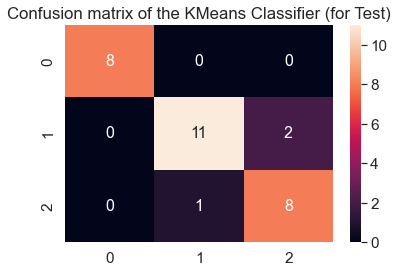

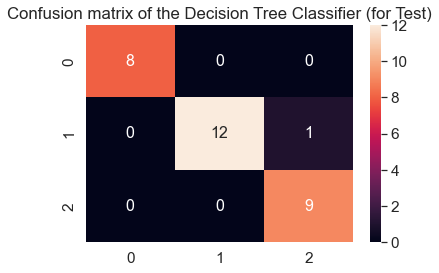

In [12]:
y_pred2 = pd.Series(kmeans_test_predictions);
y_test2 = pd.Series(y_test_list);
mt=metrics.confusion_matrix(y_test2, y_pred2)
df_cm = pd.DataFrame(mt, range(3), range(3))
sns.set(font_scale=1.4)
sns.heatmap(df_cm, annot=True, annot_kws={"size":16})
plt.title('Confusion matrix of the KMeans Classifier (for Test)')
plt.show()

y_pred3 = pd.Series(dt_test_predictions);
mt=metrics.confusion_matrix(y_test2, y_pred3)
df_cm = pd.DataFrame(mt, range(3), range(3))
sns.set(font_scale=1.4)
sns.heatmap(df_cm, annot=True, annot_kws={"size":16})
plt.title('Confusion matrix of the Decision Tree Classifier (for Test)')
plt.show()

### Confusion Matrix of Train

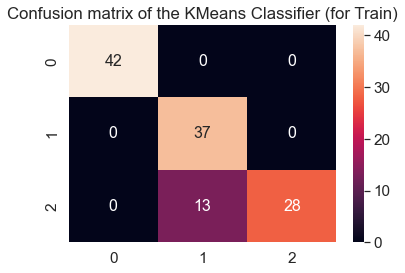

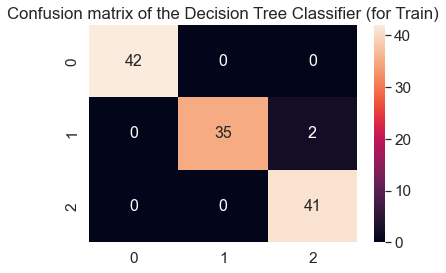

In [13]:
x_pred2 = pd.Series(kmeans_train_predictions);
x_test2 = pd.Series(y_train_list);
mt = metrics.confusion_matrix(x_test2, x_pred2)
df_cm = pd.DataFrame(mt, range(3), range(3))
sns.set(font_scale=1.4)
sns.heatmap(df_cm, annot=True, annot_kws={"size":16})
plt.title('Confusion matrix of the KMeans Classifier (for Train)')
plt.show()

x_pred3 = pd.Series(dt_train_predictions);
mt = metrics.confusion_matrix(x_test2, x_pred3)
df_cm = pd.DataFrame(mt, range(3), range(3))
sns.set(font_scale=1.4)
sns.heatmap(df_cm, annot=True, annot_kws={"size":16})
plt.title('Confusion matrix of the Decision Tree Classifier (for Train)')
plt.show()

### F1-Score

In [14]:
f1 = metrics.f1_score(y_test2, y_pred2, average='weighted');
print("F1-Score Test(KMeans):")
print(f1)
f1 = metrics.f1_score(y_test2, y_pred3, average='weighted');
print("F1-Score Test(Decision Tree):")
print(f1)

print("\n")

f2 = metrics.f1_score(x_test2, x_pred2, average='weighted');
print("F1-Score Train(KMeans):")
print(f2)
f2 = metrics.f1_score(x_test2, x_pred3, average='weighted');
print("F1-Score Train(Decision Tree):")
print(f2)

F1-Score Test(KMeans):
0.9006315789473684
F1-Score Test(Decision Tree):
0.9668771929824562


F1-Score Train(KMeans):
0.8895552223888056
F1-Score Train(Decision Tree):
0.9833002645502645


### Accuracy

In [15]:
accuracy = metrics.accuracy_score(y_test2, y_pred2);
print("Accuracy Test (KMeans)")
print(accuracy);
accuracy = metrics.accuracy_score(y_test2, y_pred3);
print("Accuracy Test (Decision Tree)")
print(accuracy);

print("\n")

accuracy2 = metrics.accuracy_score(x_test2, x_pred2);
print("Accuracy Train (KMeans)")
print(accuracy2);
accuracy2 = metrics.accuracy_score(x_test2, x_pred3);
print("Accuracy Train (Decision Tree)")
print(accuracy2);


Accuracy Test (KMeans)
0.9
Accuracy Test (Decision Tree)
0.9666666666666667


Accuracy Train (KMeans)
0.8916666666666667
Accuracy Train (Decision Tree)
0.9833333333333333


### Precision

In [16]:
precision = metrics.precision_score(y_test2, y_pred2, average='weighted');
print("Precision Test (KMeans):")
print(precision);
precision = metrics.precision_score(y_test2, y_pred3, average='weighted');
print("Precision Test (Decision Tree):")
print(precision);

print("\n")

precision2 = metrics.precision_score(x_test2, x_pred2, average='weighted');
print("Precision Train (KMeans):")
print(precision2);
precision2 = metrics.precision_score(x_test2, x_pred3, average='weighted');
print("Precision Train (Decision Tree):")
print(precision2);


Precision Test (KMeans):
0.9038888888888887
Precision Test (Decision Tree):
0.9700000000000001


Precision Train (KMeans):
0.9198333333333333
Precision Train (Decision Tree):
0.984108527131783


### Recal

In [17]:
recall = metrics.recall_score(y_test2, y_pred2, average='weighted');
print("Recall Test (KMeans):")
print(recall);
recall = metrics.recall_score(y_test2, y_pred3, average='weighted');
print("Recall Test (Decision Tree):")
print(recall);

print("\n")

recall2 = metrics.recall_score(x_test2, x_pred2, average='weighted');
print("Recall Train (KMeans):")
print(recall2);
recall2 = metrics.recall_score(x_test2, x_pred3, average='weighted');
print("Recall Train (Decision Tree):")
print(recall2);


Recall Test (KMeans):
0.9
Recall Test (Decision Tree):
0.9666666666666667


Recall Train (KMeans):
0.8916666666666667
Recall Train (Decision Tree):
0.9833333333333333


### Plot of ROC Curve (Test/Train) and Value of AUC (Test/Train)

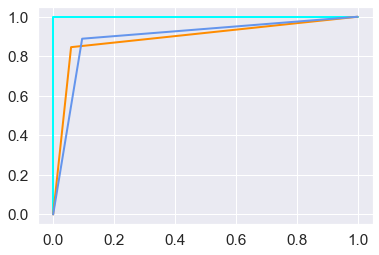

In [18]:
y_testb = label_binarize(y_test2, classes=[0, 1, 2]);
y_predb = label_binarize(y_pred2, classes=[0, 1, 2]);

fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(3):
    fpr[i], tpr[i], _ = roc_curve(y_testb[:,i], y_predb[:,i])
    roc_auc[i] = auc(fpr[i], tpr[i])


all_fpr = np.unique(np.concatenate([fpr[i] for i in range(3)]));
mean_tpr = np.zeros_like(all_fpr)
for i in range(3):
    mean_tpr += np.interp(all_fpr, fpr[i], tpr[i]);
mean_tpr /= 3;
fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"]);

colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
for i, color in zip(range(3), colors):
    plt.plot(fpr[i], tpr[i], color = color, lw=2,
    label='ROC curve of class {0} (area = {1:0.2f})'.format(i, roc_auc[i]))

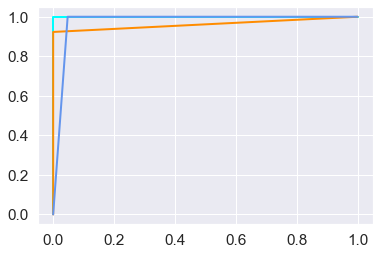

In [19]:
y_testb = label_binarize(y_test2, classes=[0, 1, 2]);
y_predb = label_binarize(y_pred3, classes=[0, 1, 2]);

fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(3):
    fpr[i], tpr[i], _ = roc_curve(y_testb[:,i], y_predb[:,i])
    roc_auc[i] = auc(fpr[i], tpr[i])


all_fpr = np.unique(np.concatenate([fpr[i] for i in range(3)]));
mean_tpr = np.zeros_like(all_fpr)
for i in range(3):
    mean_tpr += np.interp(all_fpr, fpr[i], tpr[i]);
mean_tpr /= 3;
fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"]);

colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
for i, color in zip(range(3), colors):
    plt.plot(fpr[i], tpr[i], color = color, lw=2,
    label='ROC curve of class {0} (area = {1:0.2f})'.format(i, roc_auc[i]))

#### Observations:
- If we have no idea about the data and want to group data points to understand their collective behavior, we can use KMeans Clustering.
- If there is a need to classify objects or categories based on their historical classifications and attributes, then Decision Tree Classification can be used.
- Decision Tree is a supervised learning algorithm; k-means clustering is an unsupervised learning algorithm.
- As we can see from all the results, Decision Tree Classifier performs better than KMeans Clustering Classifier.